In [54]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns

# machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pickle

In [55]:
df = pd.read_csv('../data/model_data.csv')
df.head()

,Name,networth,category,gender,profile_pic,age,DOB,nationality,education,marital_status,source_of_wealth,birth_place,personal_details,profile_link,Degree,age_group,log_networth
0,Chad Hurley,335000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,44.0,"January 24, 1977",United States,"Indiana University of Pennsylvania, Twin Valle...",Married,"YouTube, MixBit, Internet","Reading, Pennsylvania, United States",American born Chad Hurley has an estimated net...,https://www.therichest.com/celebnetworth/celeb...,Post Graduate,2,19.629641
1,Kit Crawford,330000000.0,Business,Female,https://static1.therichestimages.com/wordpress...,34.0,NaN,United States,"Sonoma State University, Ohlone College",Married,Winery,United States,Kit Crawford is an American-Canadian entrepren...,https://www.therichest.com/celebnetworth/celeb...,high school,2,19.614603
2,Alisa Moussaieff,330000000.0,Business,Female,https://static1.therichestimages.com/wordpress...,91.0,"August 13, 1929",Israel,University of New South Wales,Married,Retail (Jewellery),Wien,With boutiques on London's Bond Street and in ...,https://www.therichest.com/celebnetworth/celeb...,Graduate,4,19.614603
3,Brian Souter,328000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,66.0,5 May 1954,United Kingdom,Abertay University,Married,Business (Souter Investments Limited),"Perth, United Kingdom",Sir Brian Souter is a Scottish businessman wit...,https://www.therichest.com/celebnetworth/celeb...,Post Graduate,3,19.608524
4,Joe Lacob,325000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,34.0,NaN,United States,"University of California, Irvine, University o...",Married,Kleiner Perkins Caufield & Byers and The Golde...,United States,Joseph Lacob is a partner at Kleiner Perkins C...,https://www.therichest.com/celebnetworth/celeb...,high school,2,19.599336


### Encoding : 

In [56]:
label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['category']= label_encoder.fit_transform(df['category'])
df['Degree']= label_encoder.fit_transform(df['Degree'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['nationality']= label_encoder.fit_transform(df['nationality'])

In [57]:
X = df[['gender', 'category', 'Degree', 'marital_status', 'nationality', 'age']]
y_log = df['log_networth']
y = df['networth']

### Correlation : 

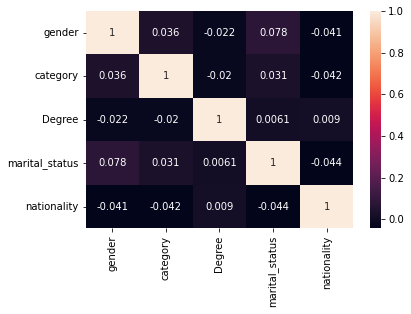

In [58]:
sns.heatmap(X.corr(), annot= True);

### Feature importance

In [59]:
model = ExtraTreesRegressor()
model.fit(X,y_log)
print(model.feature_importances_)

[0.04375638 0.46516623 0.06412904 0.12539925 0.3015491 ]


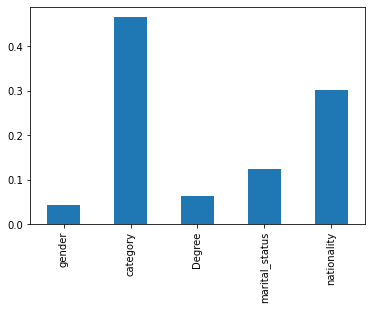

In [60]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.plot(kind='bar')
plt.show();

In [61]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

### Train test split 

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)

In [63]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
    x_scaled, y_log, test_size=0.2, random_state=42)

In [64]:
data = {}

data['x_train'] = x_train 
data['x_test'] = x_test
data['y_train'] = y_train 
data['y_test'] = y_test

data['x_train_log'] = x_train_log 
data['x_test_log'] = x_test_log
data['y_train_log'] = y_train_log 
data['y_test_log'] = y_test_log

data['x_feature'] = list(X.columns)
data['y_feature'] = 'networth'

In [65]:
root = '../data/ML_models/'

file = open(root+'model_data.pkl', 'wb')
pickle.dump(data, file)
file.close()

scaler_file = open(root+'StandardScaler.pkl', 'wb')
pickle.dump(scalar, scaler_file)
scaler_file.close()